NAMA : Mohammad Nurdin Prastya Hermansah

Prodi : D4 Teknik Elektronika

NIM: 20507334047

# Machine Learning Exercise 2 - Logistic Regression

In this exercise we'll implement logistic regression and apply it to a classification task.  We'll also improve the robustness of our implementation by adding regularization to the training algorithm. and testing it on a more difficult problem.

**Aertinya**

Dalam latihan ini kita akan menerapkan logistic regression untuk menerapkannya pada tugas pengklasifikasian. Kami juga akan meningkatkan ketahanan penerapan kami dengan menambahkan regularisasi ke algoritme pelatihan. dan mengujinya pada soal yang lebih sulit.

## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a student gets admitted to a university.  Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression.  For each training example, you have the applicant's scores on two exams and the admissions decision.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

**Artinya**

Pada bagian pertama latihan ini, kita akan membuat model regresi logistik untuk memprediksi apakah seorang siswa diterima di universitas. Misalkan Anda adalah administrator departemen universitas dan Anda ingin menentukan peluang penerimaan setiap pelamar berdasarkan hasil mereka pada dua ujian. Anda harus memiliki data historis dari pelamar sebelumnya yang dapat Anda gunakan sebagai set pelatihan untuk melakukan logistic regression. Untuk setiap contoh pelatihan, Anda memiliki skor pelamar pada dua ujian dan keputusan penerimaan. Untuk melakukannya, kami akan membuat model klasifikasi yang memperkirakan kemungkinan penerimaan berdasarkan nilai ujian.

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
# import data
from google.colab import files
uploaded = files.upload()

Saving ex2data1.txt to ex2data1.txt


In [3]:
# membaca dan menampilkan data
import io
data = pd.read_csv(io.BytesIO(uploaded['ex2data1.txt']))
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Let's create a scatter plot of the two scores and use color coding to visualize if the example is positive (admitted) or negative (not admitted).

**Artinya**

Mari buat persebaran/scatter plot dari dua skor dan gunakan kode warna untuk memvisualisasikan jika positif (diterima) dan negatif (tidak diterima).

Text(0, 0.5, 'Exam 2 Score')

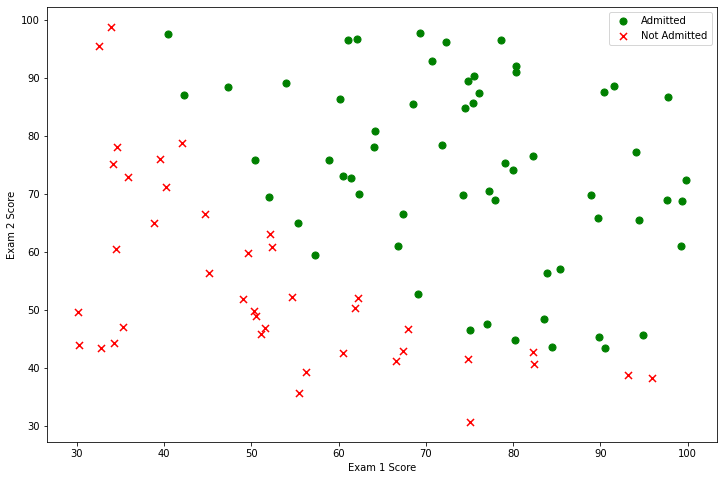

In [5]:
# plot skor positif
positive = data[data['Admitted'].isin([1])]
# plotn skor negatif
negative = data[data['Admitted'].isin([0])]

# menampilkan hasil pemvisualisasian skor
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='g', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

It looks like there is a clear decision boundary between the two classes.  Now we need to implement logistic regression so we can train a model to predict the outcome.  The equations implemented in the following code samples are detailed in "ex2.pdf" in the "exercises" folder.

**Artinya**

Sekarang kita sudah tau ada batas daerah persebaran data yang jelas antara kedua kelas dan hal yang perlu dilakukan sekarang adalah kita perlu mengimplementasikan regresi logistik sehingga kita dapat melatih model untuk memprediksi hasilnya. Persamaan yang diimplementasikan dalam contoh kode berikut dirinci dalam "ex2.pdf" di folder "latihan".

First we need to create a sigmoid function.  The code for this is pretty simple.

**Artinya**

Langkah pertama kita perlu membuat fungsi sigmoid. Kode untuk ini cukup sederhana.

In [6]:
# membuat fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Let's do a quick sanity check to make sure the function is working. ( Mari lakukan pemeriksaan untuk memastikan fungsinya berfungsi )

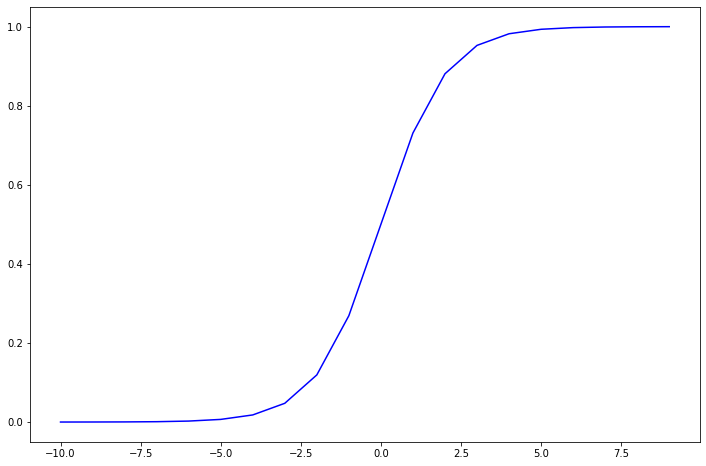

In [8]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'b')

Excellent!  Now we need to write the cost function to evaluate a solution. ( sekarang kita harus menulis fungsi cost untuk mengevaluasi solusi.)

In [9]:
# evaluasi solution
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Now we need to do some setup, similar to what we did in exercise 1 for linear regression.

Sekarang kita perlu melakukan beberapa pengaturan, serupa dengan yang kita lakukan pada latihan 1 untuk regresi linier.

In [10]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert variabel x and y to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

Let's quickly check the shape of our arrays to make sure everything looks good.

Mari periksa bentuk dari array untuk memastikan semuanya terlihat bagus.

In [11]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

Now let's compute the cost for our initial solution (0 values for theta).

Sekarang mari kita hitung cost untuk solusi awal kita (nilai 0 untuk theta).

In [12]:
cost(theta, X, y)

0.6931471805599453

Looks good.  Next we need a function to compute the gradient (parameter updates) given our training data, labels, and some parameters theta.

**Artinya**

Selanjutnya kita memerlukan fungsi untuk menghitung gradien (pembaruan parameter) yang diberikan data pelatihan, label, dan beberapa parameter theta.

In [13]:
# menghitung gradien
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

Note that we don't actually perform gradient descent in this function - we just compute a single gradient step.  In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients.  Since we're using Python, we can use SciPy's "optimize" namespace to do the same thing.

**Artinya**

- Perhatikan bahwa kami tidak benar-benar melakukan penurunan gradien dalam fungsi ini - kami hanya menghitung satu langkah gradien. 
- Dalam latihan, fungsi Oktaf yang disebut "fminunc" digunakan untuk mengoptimalkan parameter yang diberikan fungsi untuk menghitung cost dan gradien. Karena kita menggunakan Python, kita bisa menggunakan namespace "optimasi" SciPy untuk melakukan hal yang sama.

Let's look at a single call to the gradient method using our data and initial paramter values of 0.

**Artinya**

Mari kita lihat satu panggilan ke metode gradien menggunakan data Anda dan nilai parameter awal 0.

In [14]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

Sekarang kita bisa menggunakan scipy's truncated newton (TNC) dimplementasikan untuk mencari parameter optimal

In [15]:
# import library scipy
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131857,   0.20623159,   0.20147149]), 36, 0)

Let's see what the our cost looks like with this solution.
(Mari kita lihat seperti apa cost kita dengan solusi ini.)

In [16]:
cost(result[0], X, y)

0.20349770158947483

Next we need to write a function that will output predictions for a dataset X using our learned parameters theta.  We can then use this function to score the training accuracy of our classifier.

**Artinya**

Selanjutnya kita perlu menulis sebuah fungsi yang akan menampilkan prediksi untuk dataset X menggunakan theta parameter yang kita pelajari. Kami kemudian dapat menggunakan fungsi ini untuk menilai akurasi pelatihan pengklasifikasi kami.

In [17]:
#  menampilkan prediksi untuk dataset X menggunakan theta 
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [18]:
# fungsi untuk menilai akurasi pelatihan
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time.  Not bad!  Keep in mind that this is training set accuracy though.  We didn't keep a hold-out set or use cross-validation to get a true approximation of the accuracy so this number is likely higher than its true perfomance (this topic is covered in a later exercise).


Pengklasifikasi regresi logistik kami memprediksi dengan benar apakah seorang siswa diterima atau tidak sebesar 89% dari waktu. Tidak buruk! Perlu diingat bahwa ini adalah akurasi set pelatihan. Kami tidak mempertahankan set penahan atau menggunakan validasi silang untuk mendapatkan perkiraan akurasi yang sebenarnya sehingga angka ini kemungkinan lebih tinggi dari kinerja sebenarnya (topik ini dibahas dalam latihan selanjutnya).

# **Kesimpulan**

Dari praktikum ini kita membuat model regresi logistik untuk memprediksi apakah seorang siswa diterima di universitas dan dalam menggunakan metode Logistic Regression hal yang harus dilakukan adalah:
1. menyipakan data yang akan diolah
2. mengimport library yang dibutuhkan
3. mengimport data 
4. melakukan pembacaan data dan penampilan data
5. melakukan ploting data guna mengetahui karakteristik data, gunakan kode warna untuk memvisualisasikan jika positif (diterima) dan negatif (tidak diterima).
6. Setelah data diploting kita sudah tau ada batas daerah persebaran data yang jelas antara kedua kelas dan hal yang perlu dilakukan sekarang adalah kita perlu mengimplementasikan regresi logistik sehingga kita dapat melatih model untuk memprediksi hasilnya.
7. Langkah pertama kita perlu membuat fungsi sigmoid. Kode untuk ini cukup sederhana.
8. lakukan pemeriksaan untuk memastikan fungsinya berfungsi.
9. Tulislah fungsi cost untuk mengevaluasi solusi. 
10. Setelah evaluasi fungsi cost kita perlu melakukan beberapa pengaturan, serupa dengan yang kita lakukan pada latihan 1 untuk regresi linier yaitu:
  - add a ones column - this makes the matrix multiplication work out easier
  - set X (training data) and y (target variable)
  - convert variabel x and y to numpy arrays and initalize the parameter array theta
11. Mari periksa bentuk dari array untuk memastikan semuanya terlihat bagus menggunakan sintaks X.shape, theta.shape, y.shape.
12. Sekarang mari kita hitung cost untuk solusi awal kita (nilai 0 untuk theta).
13. Selanjutnya kita memerlukan fungsi untuk menghitung gradien (pembaruan parameter) yang diberikan data pelatihan, label, dan beberapa parameter theta.
14. Mari kita lihat satu panggilan ke metode gradien menggunakan data Anda dan nilai parameter awal 0 menggunakan sintaks gradient(theta, X, y)
15. Sekarang kita bisa menggunakan scipy's truncated newton (TNC) dimplementasikan untuk mencari parameter optimal.
16. lihat seperti apa cost kita dengan solusi ini.
17. Selanjutnya kita perlu menulis sebuah fungsi yang akan menampilkan prediksi untuk dataset X menggunakan theta parameter yang kita pelajari. Kami kemudian dapat menggunakan fungsi ini untuk menilai akurasi pelatihan pengklasifikasi kami.
18. lakukan pembacaan hasil.

## Regularized logistic regression

In the second part of this exercise, we'll improve our logistic regression algorithm from part one by adding a regularization term.  If you're not familiar with regularization, or would like some background on the equations used in this section, refer to "ex2.pdf" in the "exercises" folder.  In a nutshell, regularization is a term in the cost function that causes the algorithm to prefer "simpler" models (in this case, models will smaller coefficients).  The theory is that this helps to minimize overfitting and improve the model's ability to generalize.  With that, let's get started.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.  From these two tests, you would like to determine whether the microchips should be accepted or rejected.  To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

Similar to part 1, let's start by visualizing the data.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
data2 = pd.read_csv(io.BytesIO(uploaded['ex2data2.txt']))
data2.head()

In [ ]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

This data looks a bit more complicated than the previous example.  In particular, you'll notice that there is no linear decision boundary that will perform well on this data.  One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features.  Let's start by creating a bunch of polynomial features.

In [ ]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

Now we need to modify the cost and gradient functions from part 1 to include the regularization term.  First the cost function:

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

Notice the "reg" term in the equation.  Also note the addition of a "learning rate" parameter.  This is a hyperparameter that controls the effectiveness of the regularization term.  Now we need to add regularization to the gradient function:

In [ ]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

Initialize variables like we did in part 1.

In [ ]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

Let's initialize our learning rate to a sensible value.  We can play with this later if necessary (i.e. if the penalization is too strong or not strong enough).

In [ ]:
learningRate = 1

Now let's try calling our new regularized functions with the default (0) values for theta to make sure the calculations are working.

In [ ]:
costReg(theta2, X2, y2, learningRate)

In [ ]:
gradientReg(theta2, X2, y2, learningRate)

Now we can use the same optimization function from part 1 to compute the optimal solution.

In [ ]:
result2 = scipy.optimize.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

Finally, we can use the prediction function from part 1 to see how accurate our solution is on the training data.

In [ ]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

Although we implemented these algorithms from scratch, it's worth noting that we could also use a high-level python library like scikit-learn to solve this problem.

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

In [ ]:
model.score(X2, y2)

The accuracy is much lower than what we just computed, but keep in mind this result is using the default parameters provided by scikit-learn.  We'd likely need to do some parameter tuning to get the same accuracy that we obtained with our earlier result.

That's all for Exercise 2!  Stay tuned for the next exercise where we'll tackle multi-class image classification.